# Topic Separation

In the last notebook, I decided that I wanted to look for differences in sentiment between publications when they are talking about the same thing. I have narrowed it down significantly; I want to examine the difference in sentiment from 2013 to 2017 (inauguration of President Obama and inauguration of President Trump) within each publication, and would like to sort articles into focus on 'Republican'/'Trump' or 'Democratic'/'Democrat'/'Obama' and check for difference in sentiment between publications.

This notebook does the sorting. We will take in the sentiment datasets from an earlier notebook, sort the articles into categories, then create new a new .csv file for each topic.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [3]:
tot1 = pd.read_csv('~/Documents/big_data/tot1.csv')
tot2 = pd.read_csv('~/Documents/big_data/tot2.csv')
tot3 = pd.read_csv('~/Documents/big_data/tot3.csv')

In [4]:
#tot1.drop('Unnamed: 0', axis=1, inplace=True)
#tot2.drop('Unnamed: 0', axis=1, inplace=True)
#tot3.drop('Unnamed: 0', axis=1, inplace=True)
tot3.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound
0,0,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...,0.174167,0.672778,0.097500,-4.9132,-0.013714
1,1,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...,0.019643,0.928571,0.051786,0.6169,0.001722
2,2,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,...",0.079268,0.776732,0.119585,4.4083,0.012305
3,3,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt...",0.073787,0.798596,0.106340,1.6014,0.004470
4,4,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...,0.137550,0.772050,0.040400,-5.5531,-0.015500


In [5]:
test_art = tot1.loc[0, 'content']

In [6]:
test_list = test_art.split()

In [7]:
rep_words = ['Republican', 'Republicans', 'Trump']
rep_count = 0
for word in rep_words:
    rep_count += test_list.count(word)
    
rep_count

24

In [8]:
dem_words = ['Democratic', 'Democrats', 'Democrat', 'Obama', 'Clinton']
dem_count = 0
for word in dem_words:
    dem_count += test_list.count(word)
    print(word, test_list.count(word))

dem_count

Democratic 0
Democrats 0
Democrat 0
Obama 5
Clinton 0


5

In [9]:
partisan_counts1 = pd.DataFrame(columns=['id', 'republican', 'democrat', 'prop_rep'])
partisan_counts1  

,id,republican,democrat,prop_rep


In [10]:
def partisan_count(article):
    art_list = article.split()
    rep_count = 0
    for word in rep_words:
        rep_count += art_list.count(word)
    dem_count = 0
    for word in dem_words:
        dem_count += art_list.count(word)
    return rep_count, dem_count

In [11]:
for i, article in enumerate(tot1['content']):
    partisan_counts1.loc[i, 'id'] = tot1.loc[i, 'id']
    repdem = partisan_count(article)
    partisan_counts1.loc[i, 'republican'] = repdem[0]
    partisan_counts1.loc[i, 'democrat'] = repdem[1]

In [12]:
partisan_counts2 = pd.DataFrame(columns=['id', 'republican', 'democrat', 'prop_rep'])
partisan_counts2 

,id,republican,democrat,prop_rep


In [13]:
for i, article in enumerate(tot2['content']):
    partisan_counts2.loc[i, 'id'] = tot2.loc[i, 'id']
    repdem = partisan_count(article)
    partisan_counts2.loc[i, 'republican'] = repdem[0]
    partisan_counts2.loc[i, 'democrat'] = repdem[1]

In [14]:
partisan_counts3 = pd.DataFrame(columns=['id', 'republican', 'democrat', 'prop_rep'])
partisan_counts3 

,id,republican,democrat,prop_rep


In [15]:
for i, article in enumerate(tot3['content']):
    partisan_counts3.loc[i, 'id'] = tot3.loc[i, 'id']
    repdem = partisan_count(article)
    partisan_counts3.loc[i, 'republican'] = repdem[0]
    partisan_counts3.loc[i, 'democrat'] = repdem[1]

In [16]:
partisan_counts1['political'] = partisan_counts1['republican'] + partisan_counts1['democrat']
partisan_counts1.loc[partisan_counts1['political'] != 0, 'prop_rep'] = partisan_counts1.loc[partisan_counts1['political'] != 0, 'republican'] / partisan_counts1.loc[partisan_counts1['political'] != 0, 'political']
partisan_counts1 = partisan_counts1.dropna()


In [17]:
partisan_counts2['political'] = partisan_counts2['republican'] + partisan_counts2['democrat']
partisan_counts2.loc[partisan_counts2['political'] != 0, 'prop_rep'] = partisan_counts2.loc[partisan_counts2['political'] != 0, 'republican'] / partisan_counts2.loc[partisan_counts2['political'] != 0, 'political']
partisan_counts2 = partisan_counts2.dropna()

In [18]:
partisan_counts3['political'] = partisan_counts3['republican'] + partisan_counts3['democrat']
partisan_counts3.loc[partisan_counts3['political'] != 0, 'prop_rep'] = partisan_counts3.loc[partisan_counts3['political'] != 0, 'republican'] / partisan_counts3.loc[partisan_counts3['political'] != 0, 'political']
partisan_counts3 = partisan_counts3.dropna()

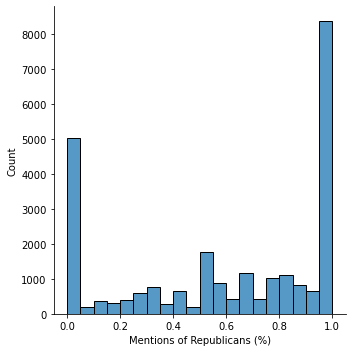

In [19]:
sns.displot(partisan_counts1['prop_rep'])
plt.xlabel('Mentions of Republicans (%)');

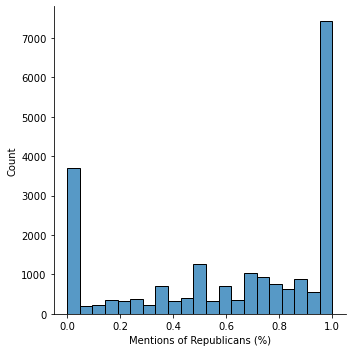

In [20]:
sns.displot(partisan_counts2['prop_rep'])
plt.xlabel('Mentions of Republicans (%)');

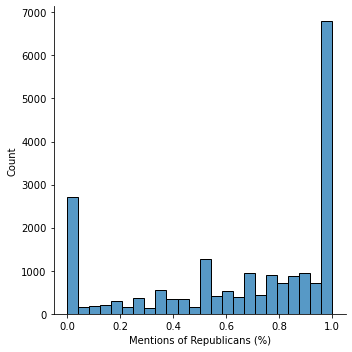

In [21]:
sns.displot(partisan_counts3['prop_rep'])
plt.xlabel('Mentions of Republicans (%)');

The news really, really prefered to talk about Republicans between 2011 and 2017. Very, very much.

For our purposes, we will say that an article is about Republicans if more than 50% of mentions of political party, Trump, or Obama are about Republicans. If less than 50% of the mentions are Republican, then we will say it is about Democrats.

In [22]:
# Merge sentiment onto the partisan topic dataframes
partisan1 = pd.merge(partisan_counts1, tot1, how='left', on='id')
partisan2 = pd.merge(partisan_counts2, tot2, how='left', on='id')
partisan3 = pd.merge(partisan_counts3, tot3, how='left', on='id')
partisan1.head()

,id,republican,democrat,prop_rep,political,Unnamed: 0,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound,pub_label
0,17283,24,5,0.827586,29,0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,0.083857,0.794857,0.085536,0.7504,0.002095,4
1,17286,0,1,0,1,3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",0.083333,0.815387,0.087933,0.0790,0.000221,4
2,17287,1,0,1,1,4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",0.035037,0.854296,0.073667,2.6097,0.007285,4
3,17289,3,2,0.6,5,6,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,0.093217,0.856609,0.050174,-3.7254,-0.010399,4
4,17293,20,4,0.833333,24,10,Weak Federal Powers Could Limit Trump’s Climat...,New York Times,Justin Gillis,2017-01-03,2017.0,1.0,NaN,With Donald J. Trump about to take control of ...,0.060789,0.830333,0.091263,5.6661,0.015816,4


In [23]:
# Make a topic label, 0 for Democrats, 1 for Republicans
partisan1['topic'] = 0
partisan1.loc[partisan1['prop_rep'] > 0.5, 'topic'] = 1
partisan1.head()

,id,republican,democrat,prop_rep,political,Unnamed: 0,title,publication,author,date,...,month,url,content,neg,neu,pos,compound,scaled_compound,pub_label,topic
0,17283,24,5,0.827586,29,0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,...,12.0,NaN,WASHINGTON — Congressional Republicans have...,0.083857,0.794857,0.085536,0.7504,0.002095,4,1
1,17286,0,1,0,1,3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,...,4.0,NaN,"Death may be the great equalizer, but it isn’t...",0.083333,0.815387,0.087933,0.0790,0.000221,4,0
2,17287,1,0,1,1,4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,...,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",0.035037,0.854296,0.073667,2.6097,0.007285,4,1
3,17289,3,2,0.6,5,6,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,...,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,0.093217,0.856609,0.050174,-3.7254,-0.010399,4,1
4,17293,20,4,0.833333,24,10,Weak Federal Powers Could Limit Trump’s Climat...,New York Times,Justin Gillis,2017-01-03,...,1.0,NaN,With Donald J. Trump about to take control of ...,0.060789,0.830333,0.091263,5.6661,0.015816,4,1


In [24]:
partisan2['topic'] = 0
partisan2.loc[partisan2['prop_rep'] > 0.5, 'topic'] = 1
partisan2.head()

,id,republican,democrat,prop_rep,political,Unnamed: 0,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound,topic
0,73474,1,4,0.2,5,2,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...,0.084594,0.752375,0.069250,-3.5558,-0.009925,0
1,73475,17,2,0.894737,19,3,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...,0.058313,0.836833,0.083979,3.6127,0.010084,1
2,73476,8,5,0.615385,13,4,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...,0.035208,0.874417,0.048750,1.7098,0.004773,1
3,73477,4,0,1,4,5,Seth Meyers Questions Kellyanne Conway (and th...,Atlantic,Megan Garber,2017-01-11,2017.0,1.0,NaN,Here was one of the first questions that Seth ...,0.028255,0.860647,0.091490,10.4083,0.029053,1
4,73478,0,9,0,9,6,Obama Frames His Economic Legacy,Atlantic,Gillian B. White,2017-01-11,2017.0,1.0,NaN,"In Barack Obama’s final speech as president, h...",0.096379,0.777966,0.091138,1.1537,0.003220,0


In [25]:
partisan3['topic'] = 0
partisan3.loc[partisan3['prop_rep'] > 0.5, 'topic'] = 1
partisan3.head()

,id,republican,democrat,prop_rep,political,Unnamed: 0,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound,topic
0,151914,4,2,0.666667,6,5,My dad’s Reagan protests inspire me to stand u...,Guardian,Steven W Thrasher,2016-11-28,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,I have been battling depression and sleeplessn...,0.101114,0.817432,0.058795,-2.6947,-0.007522,1
1,151917,0,2,0,2,8,NSA contractor arrested for alleged theft of t...,Guardian,Ewen MacAskill,2016-10-05,2016.0,10.0,https://www.theguardian.com/us-news/2016/oct/0...,The FBI has arrested a National Security Agenc...,0.073517,0.811200,0.081950,2.5060,0.006995,0
2,151918,14,0,1,14,9,Donald Trump to dissolve his charitable founda...,Guardian,Ben Jacobs,2016-12-24,2016.0,12.0,https://www.theguardian.com/us-news/2016/dec/2...,Donald Trump announced on Saturday that he wil...,0.045000,0.823391,0.088043,4.2832,0.011956,1
3,151920,0,2,0,2,11,The strange case of Pamela Anderson’s news-hog...,Guardian,NaN,2016-10-17,2016.0,10.0,https://www.theguardian.com/media/shortcuts/20...,Name: Pamela Anderson. Age: 49. Occupation: De...,0.086733,0.755867,0.157400,1.0419,0.002908,0
4,151921,20,4,0.833333,24,12,‘Voting for a racist’: Trump enters key debate...,Guardian,Sabrina Siddiqui,2016-09-25,2016.0,9.0,https://www.theguardian.com/us-news/2016/sep/2...,From the moment in May when Donald Trump all b...,0.064561,0.851610,0.059439,-2.1517,-0.006006,1


In [26]:
rep_arts = partisan1[partisan1['topic']==1]
rep_arts = rep_arts.append(partisan2[partisan2['topic'] == 1])
rep_arts = rep_arts.append(partisan3[partisan3['topic'] == 1])
rep_arts.shape
rep_arts.to_csv('rep_arts.csv')

In [27]:
dem_arts = partisan1[partisan1['topic']==0]
dem_arts = dem_arts.append(partisan2[partisan2['topic'] == 0])
dem_arts = dem_arts.append(partisan3[partisan3['topic'] == 0])
dem_arts.shape
dem_arts.to_csv('dem_arts.csv')

We have 42,689 political articles about Republicans and 24,984 articles about Democrats. That should be more than enough to look for differences.

## Analysis of Republican Articles

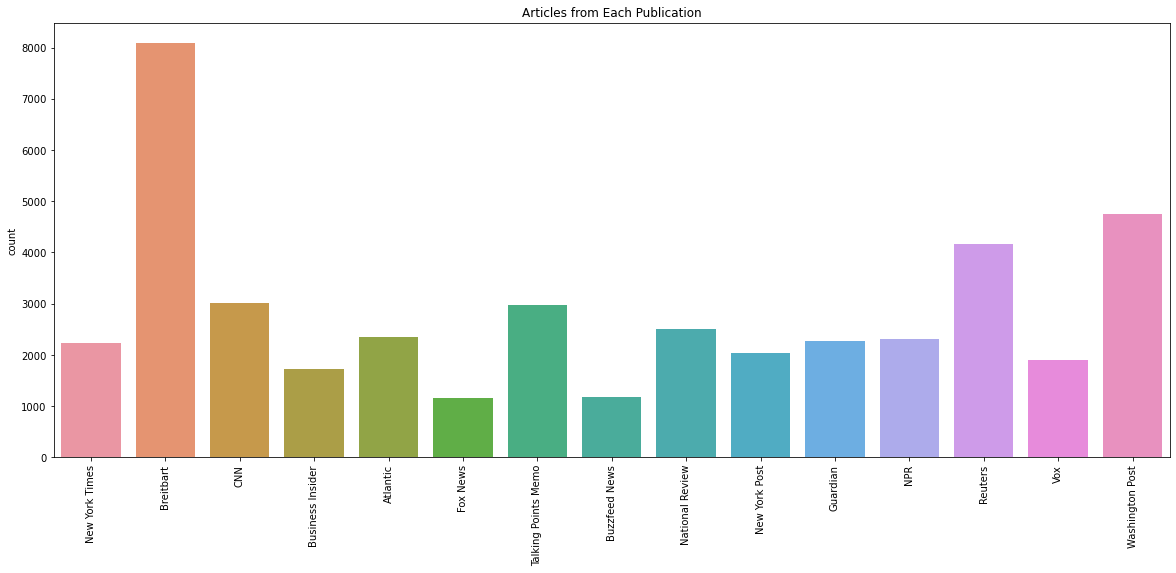

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(x=rep_arts['publication'])
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Articles from Each Publication');

What is the distribution of scaled compound sentiment throughout all of the articles about Republicans?

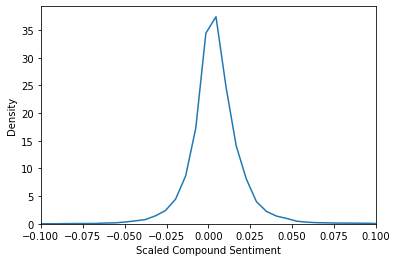

In [28]:
sns.kdeplot(x=rep_arts['scaled_compound'])
plt.xlabel('Scaled Compound Sentiment')
plt.ylabel('Density')
plt.xlim(-0.1, 0.1);

In [29]:
# Create a table of this information, too.
rep_arts[['neg', 'pos', 'neu', 'scaled_compound']].describe()

,neg,pos,neu,scaled_compound
count,42689.000000,42689.000000,42689.000000,42689.000000
mean,0.061130,0.073576,0.829493,0.004428
std,0.034368,0.031205,0.057831,0.018774
min,0.000000,0.000000,0.286500,-0.187979
25%,0.037171,0.053087,0.798556,-0.003188
50%,0.056455,0.071422,0.834587,0.003308
75%,0.080000,0.091274,0.867091,0.011079
max,0.415497,0.332111,1.000000,1.000000


The mean scaled compound sentiment is slightly higher than zero, indicating that the articles have a generally favorable view of Republicans. However, this could be because some publications are more heavily represented than others. We can also see that the article scoring a +1, the most positive article in the dataset, is about Republicans. It is a transcript of FBI Director James Comey testifying before Congress on Russian interference in the 2016 election.

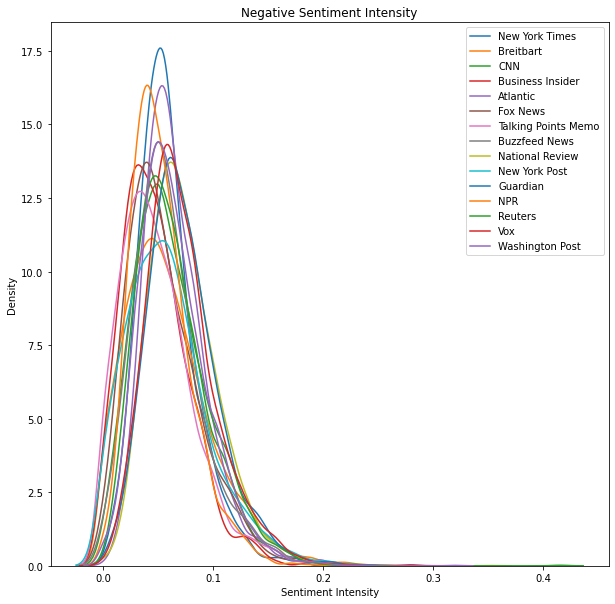

In [30]:
# KDE Plots of Sentiment...
rep_pubs = rep_arts['publication'].unique()
plt.figure(figsize=(10,10))
for pub in rep_pubs:
    sns.kdeplot(rep_arts.loc[rep_arts['publication'] == pub, 'neg'])
plt.xlabel('Sentiment Intensity')
plt.title('Negative Sentiment Intensity')
plt.legend(rep_pubs);

This is a busy plot; hard to really see what is happening...but the New York Times has the obvious peak, near 0.08 negative sentiment intensity. NPR and Atlantic have peaks of the same height, but NPR's is closer to zero, indicating that they generally express less negative sentiment in articles about Republicans. The low peaks are the New York Post and Breitbart. The right tails are all pretty close together.

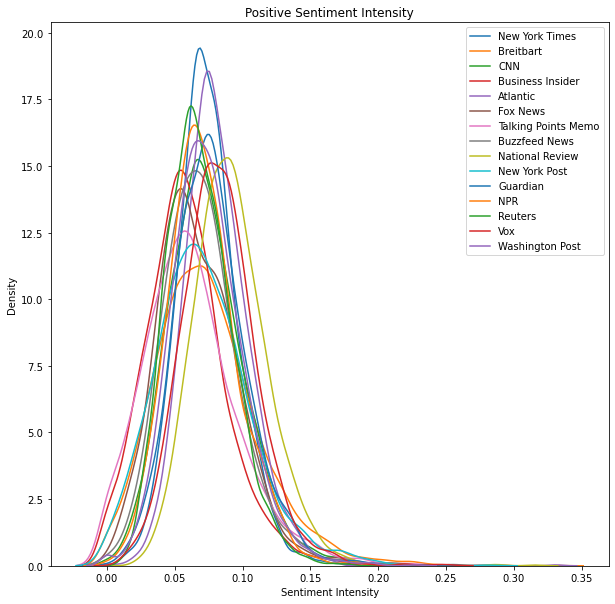

In [31]:
plt.figure(figsize=(10,10))
for pub in rep_pubs:
    sns.kdeplot(rep_arts.loc[rep_arts['publication'] == pub, 'pos'])
plt.xlabel('Sentiment Intensity')
plt.title('Positive Sentiment Intensity')
plt.legend(rep_pubs);

Once again, the high peak belongs to the New York Times. It is higher, but still centered near 0.08. The low peak this time is Breitbart, but it is also centered near 0.08. National Review has the farthest right peak, indicating highest positive sentiment in articles about Republicans, but Vox and Atlantic are close behind. National Review has the fattest right tail, though. On the left side, the most density close to zero falls under Business Insider and Talking Points Memo.

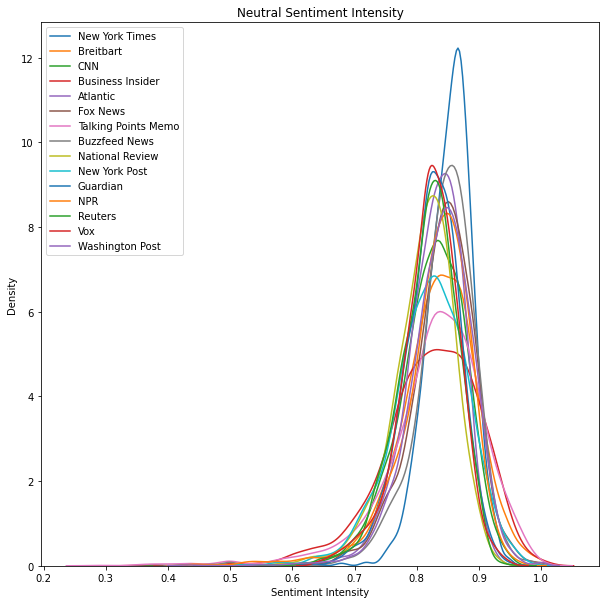

In [32]:
plt.figure(figsize=(10,10))
for pub in rep_pubs:
    sns.kdeplot(rep_arts.loc[rep_arts['publication'] == pub, 'neu'])
plt.xlabel('Sentiment Intensity')
plt.title('Neutral Sentiment Intensity')
plt.legend(rep_pubs);

The New York Times again has the highest peak, and very narrow tails. The lowest peak, by far, is Business Insider. That publication has really fat tails, indicating high variance in neutrality scores among articles on Republicans.

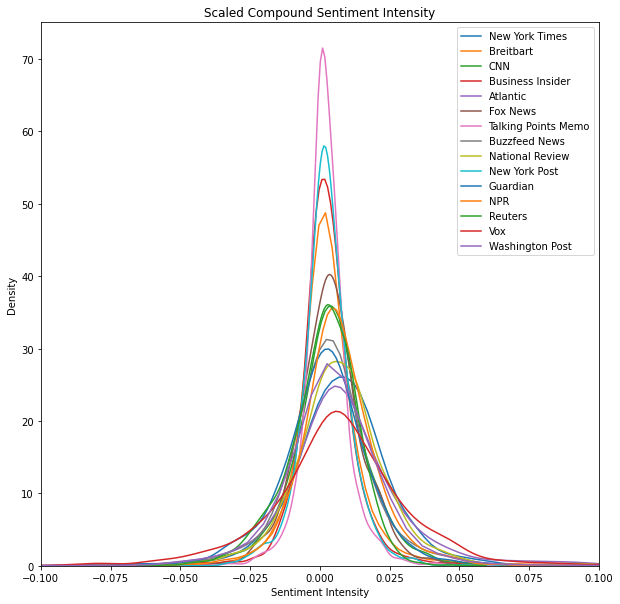

In [33]:
plt.figure(figsize=(10,10))
for pub in rep_pubs:
    sns.kdeplot(rep_arts.loc[rep_arts['publication'] == pub, 'scaled_compound'])
plt.xlabel('Sentiment Intensity')
plt.title('Scaled Compound Sentiment Intensity')
plt.legend(rep_pubs)
plt.xlim(-0.1,0.1);

The high, high peak here belongs to Talking Points Memo. It is really very high, centered near zero with thin little tails. The lowest peak, belonging to Vox, is farther right than most others, indicating more positive compound sentiment in articles about Republicans. Vox has fat tails, but the right tail is fatter than the left, indicating higher probability of positive sentiment than negative.

In [34]:
# Mean sentiment intensities in articles about Republicans, by publication
rep_arts[['publication', 'neg', 'pos', 'neu', 'scaled_compound']].groupby('publication').mean().sort_values('scaled_compound')


,neg,pos,neu,scaled_compound
publication,,,,
Reuters,0.064414,0.068897,0.817282,0.001002
Guardian,0.072671,0.077199,0.823582,0.001565
New York Post,0.058741,0.070990,0.820859,0.002260
Talking Points Memo,0.049244,0.062569,0.828690,0.002261
Business Insider,0.048489,0.058410,0.823075,0.002708
Breitbart,0.059198,0.074170,0.836062,0.003417
CNN,0.060744,0.073401,0.824722,0.003574
Fox News,0.054770,0.067149,0.840778,0.003613
Buzzfeed News,0.058969,0.069921,0.844934,0.004422


All of the publications have positive mean compound sentiment in articles about Republicans, and Atlantic has the highest mean compound sentiment of all. National Review has the highest mean negativity score as well as the highest mean positivity score; the New York Times has the highest mean neutrality score.

In [35]:
rep_arts[['publication', 'neg', 'pos', 'neu', 'scaled_compound']].groupby('publication').median().sort_values('scaled_compound')


,neg,pos,neu,scaled_compound
publication,,,,
Talking Points Memo,0.043791,0.058905,0.837215,0.001747
Business Insider,0.044385,0.056351,0.829800,0.001984
New York Post,0.054500,0.067840,0.824889,0.002048
Guardian,0.068061,0.075172,0.826952,0.002048
Breitbart,0.053059,0.070294,0.839412,0.002087
Reuters,0.058712,0.066636,0.822550,0.002321
Fox News,0.048094,0.063364,0.846683,0.003412
Buzzfeed News,0.053629,0.067396,0.850700,0.003484
CNN,0.055463,0.070591,0.829976,0.003729


Because sentiments are a bit skewed, it might make more sense to use the median rather than the mean. All publications have positive median compound sentiment in articles about Republicans as well. The New York Times has the highest median compound sentiment as well as the highest neutrality score. National Review has both the highest median negativity score and the highest median positivity score. 

In [36]:
rep_arts[['publication', 'neg', 'pos', 'neu', 'scaled_compound']].groupby('publication').std().sort_values('scaled_compound')

,neg,pos,neu,scaled_compound
publication,,,,
Talking Points Memo,0.034245,0.036104,0.082236,0.008525
New York Post,0.038007,0.034943,0.060851,0.009487
Fox News,0.032866,0.029556,0.052634,0.011489
Business Insider,0.031583,0.029536,0.077220,0.011589
Reuters,0.033486,0.024199,0.048423,0.012777
CNN,0.034545,0.028951,0.054034,0.014805
Breitbart,0.039458,0.038341,0.060662,0.016294
NPR,0.027326,0.026442,0.062041,0.016499
Guardian,0.032272,0.027443,0.046296,0.016861


We ought to look at variance measures, also. Atlantic has the highest variance in scaled compound sentiment; Breitbart has the highest variance in negativity and positivity; Talking Points Memo has the highest variance in neutrality. The New York Times has the lowest variance in every sentiment score except for scaled compound. 

## ANOVA and Linear Regression

At this point, I want to run a Linear Regression and an ANOVA to look for statistically significant differences in sentiment between the publications, in articles about Republicans.

An ANOVA can tell us if there is a statistically significant difference in mean sentimentality between the publications, but it relies on three important assumptions.

1. The measurements must be independent; this is not technically possible here, but we can approximate independence by including the author and date in the model to separate the effect of the publication from the effect of any individual or what might have been happening at the time.
2. The data should be normally distributed; this is checked by looking at the distribution of the residuals. It can be proven that normally-distributed residuals imply normally-distributed data, and that checking the residuals is more statistically powerful than checking the data itself.
3. The groups must be homoscedastic; the sentimentality ratings from each publication must have the same variance. This can be checked using a Bartlett test if the data in normally distributed or a Brown-Forsythe test if the data isn't. 

We will first look at the data in boxplots and try out a test for heteroscedasticity, then fit the model, run the ANOVA, check the residuals, and draw the appropriate conclusions.

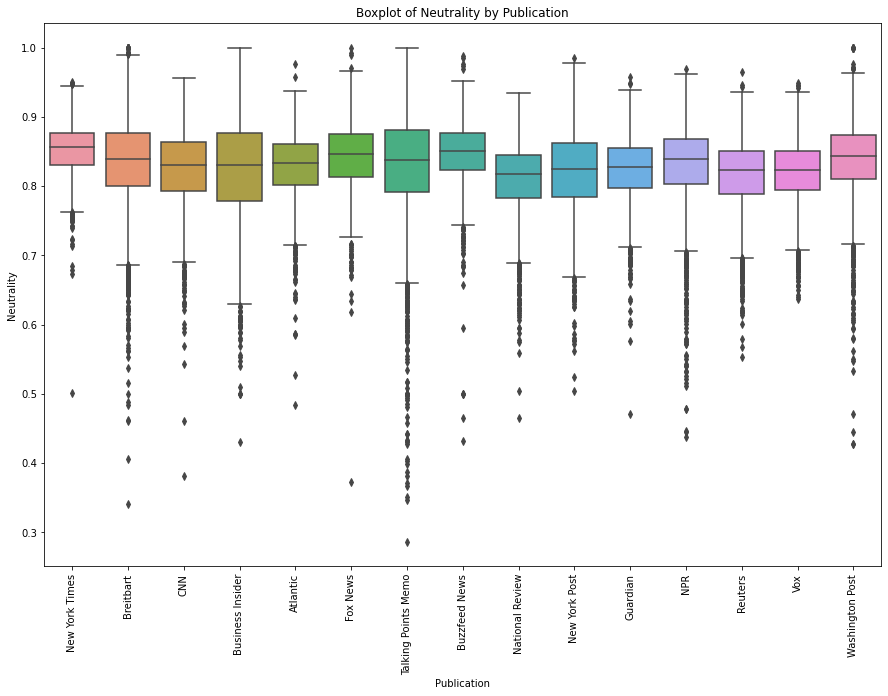

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(x='publication', y='neu', data=rep_arts)
plt.xticks(rotation=90)
plt.xlabel('Publication')
plt.ylabel('Neutrality')
plt.title('Boxplot of Neutrality by Publication')
plt.show();

The boxplot looks good. There are quite a few low outliers, especially when it comes to Talking Points Memo and Breitbart, but there is no immediately obvious problem for the analysis. Next, a normal probability plot to see if we should do a Bartlett or Brown-Forsythe test.

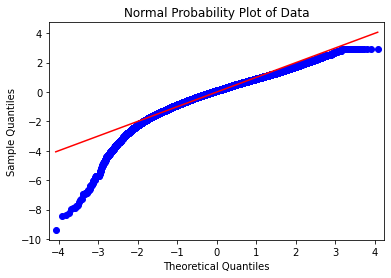

In [38]:
from statsmodels.graphics.gofplots import qqplot

neutrality_scaled = (rep_arts['neu'] - rep_arts['neu'].mean()) / rep_arts['neu'].std()
qqplot(neutrality_scaled, line='s')
plt.title('Normal Probability Plot of Data')
plt.show();

This normal probability plot shows a bit of deviation from normallity in the tails. However, it does not appear bad enough to cause problems with the ANOVA (normallity tests on data have quite low power) and a Bartlett test for heteroscedasticity is still appropriate.

In this test, the null hypothesis is that the neutrality scores of the publishers have the same variance. If the p-value is low, there is a low probability of homoscedasticity. We are hoping for a relatively high p-value so we can perform an ANOVA without transforming the data.

In [39]:
import pingouin as pngn

pngn.homoscedasticity(data=rep_arts, dv='neu', group='publication', method='bartlett')

,T,pval,equal_var
bartlett,3108.459141,0.0,False


Oh dear. There is significant evidence that the publications do not have equal variance. This, combined with the large difference in sample size from each publisher, is problematic for an ANOVA. Let's see just how bad the difference is.

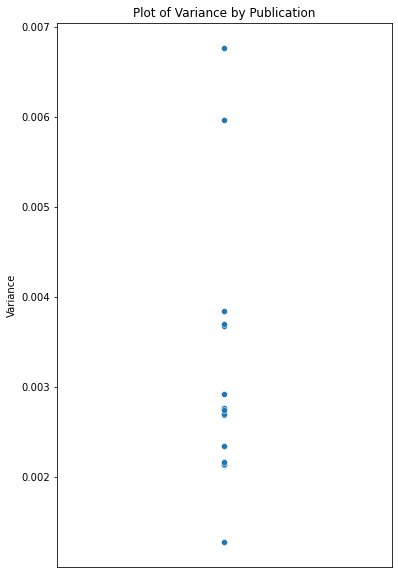

In [40]:
plt.figure(figsize=(6,10))
sns.scatterplot(y=rep_arts.groupby('publication')['neu'].var(), x=1)
plt.title('Plot of Variance by Publication')
plt.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
plt.ylabel('Variance')
plt.show();

This does not look great. A transformation might fix the problem. Let's try running the ANOVA and check out the residuals before we get too worried about the heteroscedasticity. It is possible that the model will still fit quite well. 

An ANOVA starts with a linear regression; the ANalysis Of VAriance is an extention of the linear regression model. The linear model must include the feature of interest (Publication) as well as any blocking variables (Date, Author) and should typically include the interactions between variables. 

Let's fit the linear model now and look at a summary.

Actually, I first want to look at the neutrality rating as a time series to see if there is a noteable shift in sentiment. If there is, then we will need to find a way to remove the effect of time from the ANOVA.

In [41]:
rep_arts.head()

,id,republican,democrat,prop_rep,political,Unnamed: 0,title,publication,author,date,...,month,url,content,neg,neu,pos,compound,scaled_compound,pub_label,topic
0,17283,24,5,0.827586,29,0,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,...,12.0,NaN,WASHINGTON — Congressional Republicans have...,0.083857,0.794857,0.085536,0.7504,0.002095,4.0,1
2,17287,1,0,1,1,4,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,...,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",0.035037,0.854296,0.073667,2.6097,0.007285,4.0,1
3,17289,3,2,0.6,5,6,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,...,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...,0.093217,0.856609,0.050174,-3.7254,-0.010399,4.0,1
4,17293,20,4,0.833333,24,10,Weak Federal Powers Could Limit Trump’s Climat...,New York Times,Justin Gillis,2017-01-03,...,1.0,NaN,With Donald J. Trump about to take control of ...,0.060789,0.830333,0.091263,5.6661,0.015816,4.0,1
5,17294,4,1,0.8,5,11,Can Carbon Capture Technology Prosper Under Tr...,New York Times,John Schwartz,2017-01-05,...,1.0,NaN,"THOMPSONS, Tex. — Can one of the most promi...",0.020135,0.882284,0.097608,17.6686,0.049319,4.0,1


In [42]:
rep_arts['date'] = pd.to_datetime(rep_arts['date'])
rep_arts = rep_arts.sort_values('date')

grouped_rep = rep_arts.groupby(['publication', 'date']).mean()

In [43]:
grouped_rep_trimmed = rep_arts[rep_arts['date'] > '2016-01-01'].groupby(['publication', 'date']).mean()


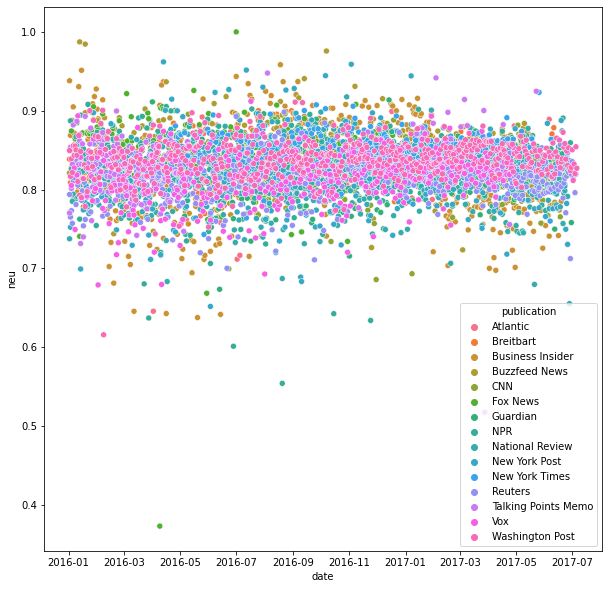

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='date', y='neu', hue='publication', data=grouped_rep_trimmed);

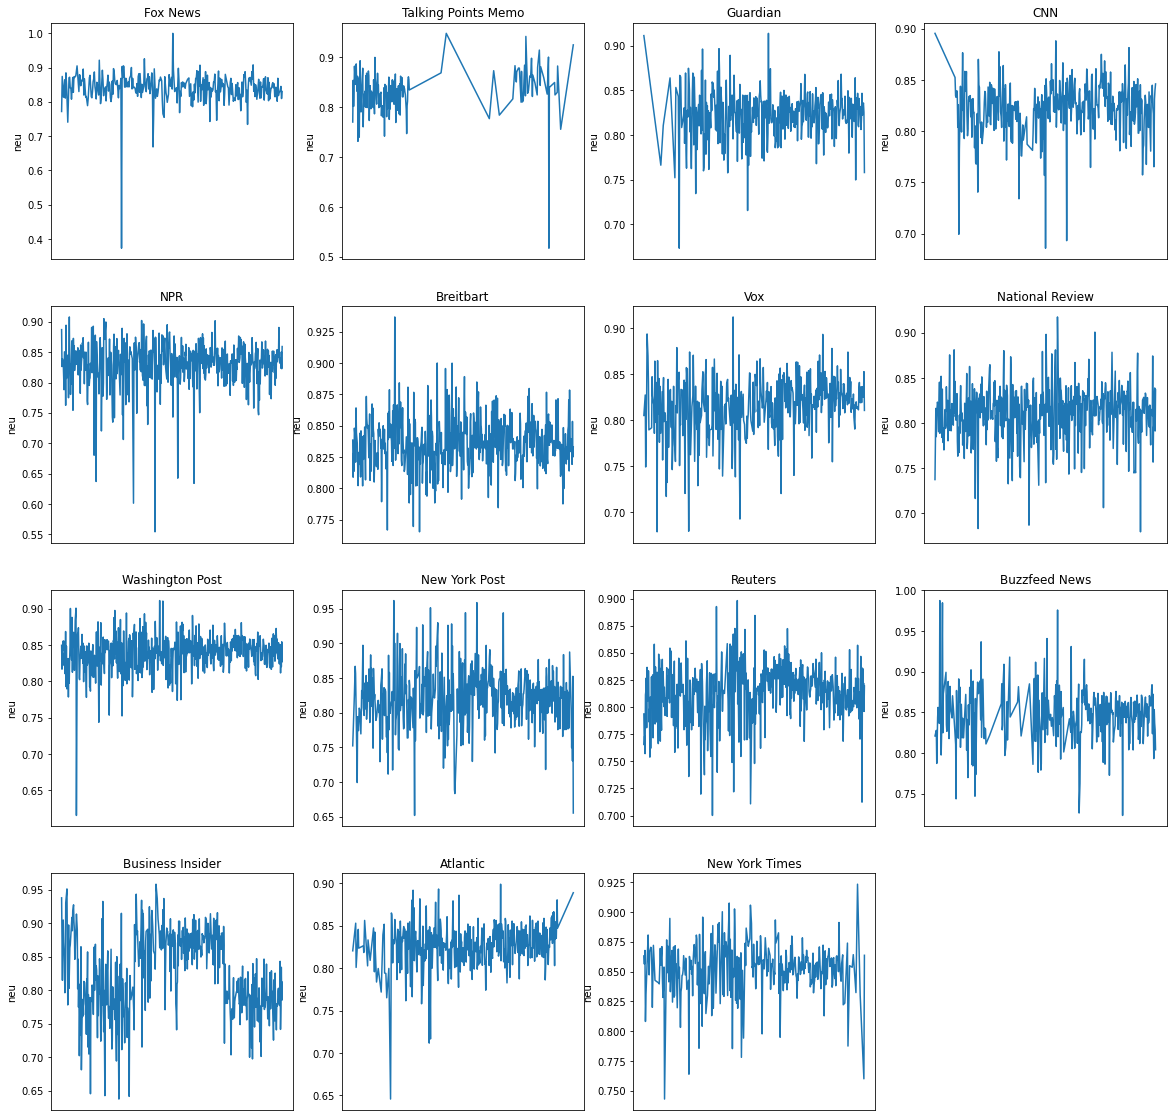

In [45]:
i = 1
plt.figure(figsize=(20,20))
for publication in rep_arts['publication'].unique():
    plt.subplot(4,4,i)
    plt.title(publication)
    plt.tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
    temp_data = grouped_rep_trimmed.loc[publication, :]
    sns.lineplot(x='date', y='neu', data=temp_data)
    i += 1

These all look stationary, meaning that they do not change *on average* over time. Let's look at boxplots over the years as well to see if there are any interesting changes.

In [160]:
rep_arts['year'] = [day.year for day in rep_arts['date']]

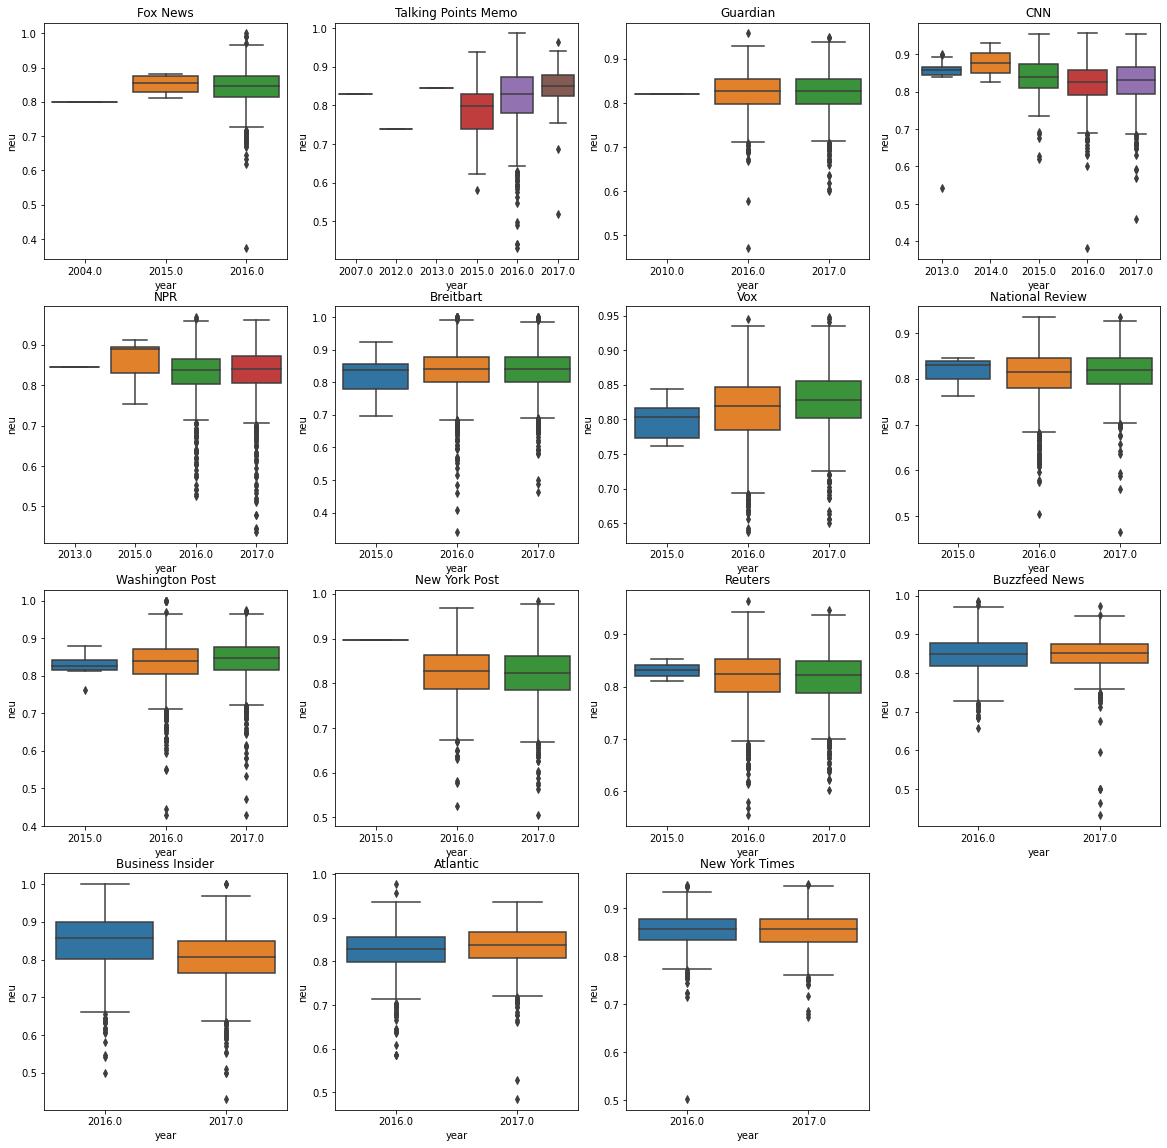

In [172]:
plt.figure(figsize=(20,20))
i = 1
for publication in rep_arts['publication'].unique():
    plt.subplot(4,4,i)
    plt.title(publication)
    sns.boxplot(x = 'year', y='neu', data=rep_arts.loc[rep_arts['publication'] == publication, ['year','neu']]);
    i += 1

We have little data before 2016, so we perhaps should not take the boxes from 2015 or earlier too seriously. We will cut off all articles before 2016 before running the statistical analysis. In 2016, there was an especially contentious presidential election in the United States, and nearly all of the publications here have the widest range in that year. Only Talking Points Memo shows a big change from one year ot the next between 2016 and 2017.

In [46]:
rep_trimmed = rep_arts[rep_arts['date'] > '2016-01-01']

In [47]:
import statsmodels.formula.api as smf

linreg = smf.ols("neu ~ C(publication)", data=rep_trimmed).fit()

In [48]:
import statsmodels.api as sm
sm.stats.anova_lm(linreg)

,df,sum_sq,mean_sq,F,PR(>F)
C(publication),14.0,4.567010,0.326215,106.697662,5.613231e-305
Residual,40600.0,124.129504,0.003057,NaN,NaN


In [49]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    neu   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     106.7
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          5.61e-305
Time:                        11:35:58   Log-Likelihood:                 59962.
No. Observations:               40615   AIC:                        -1.199e+05
Df Residuals:                   40600   BIC:                        -1.198e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.8278      0.001    726.657      0.000       0.826       0.830
C(publication)[T.Breitbart]               0.0083      0.001      6.417      0.000       0.006       0.011
C(publication)[T.Business Insider]       -0.0047      0.002     -2.690      0.007      -0.008      -0.001
C(publication)[T.Buzzfeed News]           0.0172      0.002      8.690      0.000       0.013       0.021
C(publication)[T.CNN]                    -0.0040      0.002     -2.590      0.010      -0.007      -0.001
C(publication)[T.Fox News]                0.0130      0.002      6.530      0.000       0.009       0.017
C(publication)[T.Guardian]               -0.0042      0.002     -2.570      0.010      -0.007      -0.001
C(publication)[T.NPR]                     0.0009      0.002      0.545      0.586      -0.002       0.004
C(publication)[T.National Review]        -0.0174      0.002    -10.966      0.000      -0.021      -0.014
C(publication)[T.New York Post]          -0.0070      0.002     -4.165      0.000      -0.010      -0.004
C(publication)[T.New York Times]          0.0253      0.002     15.521      0.000       0.022       0.029
C(publication)[T.Reuters]                -0.0105      0.001     -7.363      0.000      -0.013      -0.008
C(publication)[T.Talking Points Memo]    -0.0047      0.002     -2.357      0.018      -0.009      -0.001
C(publication)[T.Vox]                    -0.0073      0.002     -4.263      0.000      -0.011      -0.004
C(publication)[T.Washington Post]         0.0109      0.001      7.843      0.000       0.008       0.014
==============================================================================
Omnibus:                     7576.869   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25801.904
Skew:                          -0.934   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The ANOVA output tells us that the publication does have a statistically significant effect on the neutrality score; the regression table gives us an idea of what those effects are.

* NPR is the only publication that does not have a coefficient that is significantly different from zero
* Breitbart, Buzzfeed News, Fox News, the New York Times, and the Washington Post have positive coefficients
* Business Insider, CNN, the Guardian, the National Review, the New York Post, Reuters, Talking Points Memo, and Vox have negative coefficients
* The intercept is approximately 0.83, and the mean neutrality rating is quite close to 0.83, so while there is a significant difference in the ANOVA, it is a very small difference in neutrality rating

Let's check the residuals to make sure the ANOVA fit correctly and that the conclusions here are valid. The residuals should be normally distributed, centered around zero, with no noticable pattern.

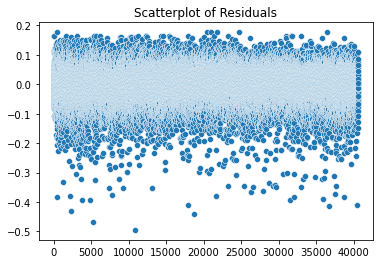

In [64]:
sns.scatterplot(x=range(len(linreg.resid)), y=linreg.resid)
plt.title('Scatterplot of Residuals');

The residuals are more-or-less centered around zero, though there are more negative residuals than positive ones. This should not be an issue. We can construct a quick confidence interval for the mean of the residuals to be sure. If zero falls inside the confidence interval, then there is no problem with the residuals so far.

In [79]:
from IPython.display import display, Math

res_mean = np.mean(linreg.resid)
res_sd = np.std(linreg.resid)
res_se = res_sd / np.sqrt(len(linreg.resid))
ci_L = res_mean - 1.96*res_se
ci_U = res_mean + 1.96*res_se

print('Confidence Interval for Mean of Residuals')
display(Math('{} < \mu < {}'.format(round(ci_L,4), round(ci_U,4))))

Confidence Interval for Mean of Residuals


<IPython.core.display.Math object>

Zero is right in the middle of that confidence interval, so there is no problem with the fit of the linear regression for the ANOVA so far.

Let's check a plot of residuals versus fitted values.

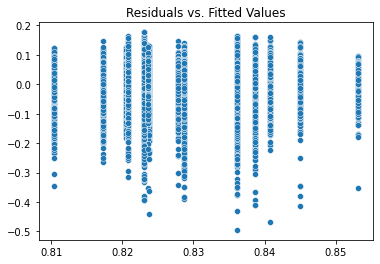

In [81]:
sns.scatterplot(x=linreg.fittedvalues, y=linreg.resid)
plt.title("Residuals vs. Fitted Values");

No problem here either! There is none of the "trumpeting" that usually indicates heteroscedasticity problems. So far, the model appears to have fit the data well. 

The last thing to check is a normal probability plot.

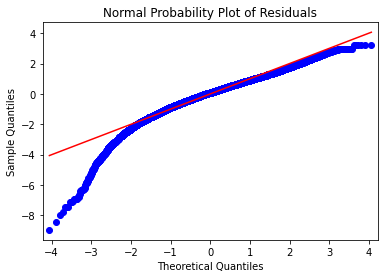

In [84]:
res_scaled = (linreg.resid - np.mean(linreg.resid)) / np.std(linreg.resid)
qqplot(res_scaled, line='s')
plt.title('Normal Probability Plot of Residuals')
plt.show();

The unusually low residuals noted in the first residual plot throw the point off the line in the normal probability plot. However, since this is not a terrible breach of normallity and appears only on one end, it is not enough to invalidate the ANOVA and results thereof. I'm glad! No transformation of the data is necessary.

Now, let's do the same analysis with the scaled_compound feature.

### Scaled_compound Analysis

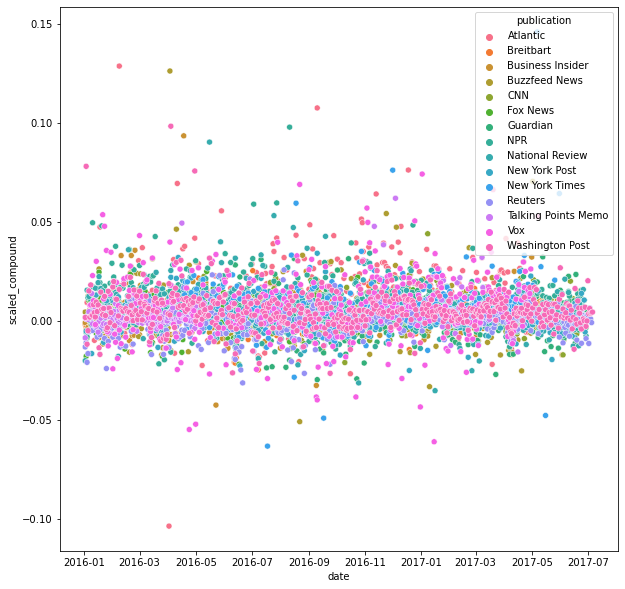

In [51]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='date', y='scaled_compound', hue='publication', data=grouped_rep_trimmed);

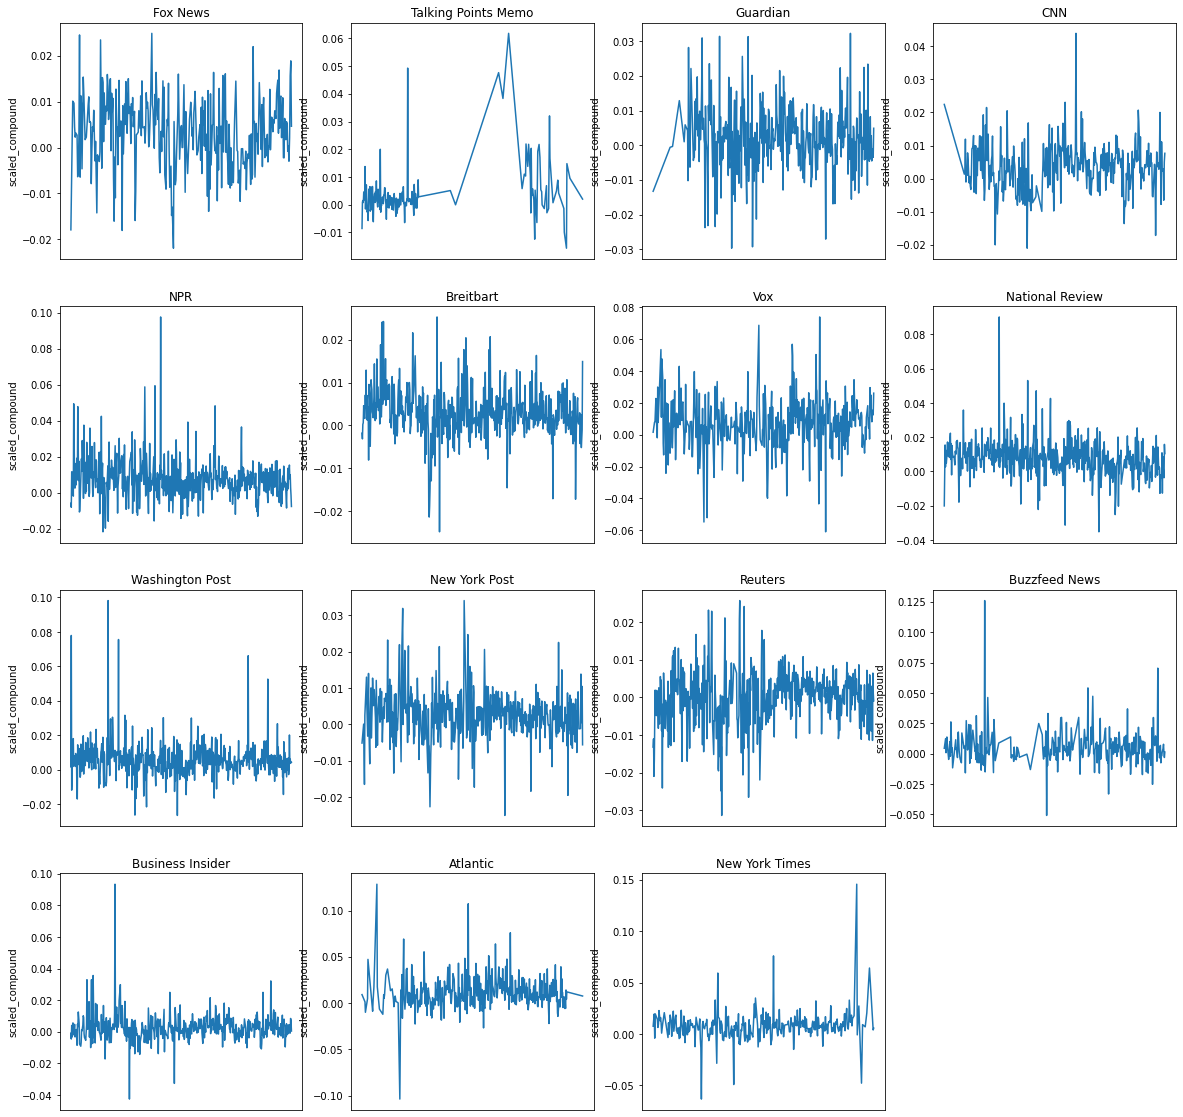

In [53]:
i = 1
plt.figure(figsize=(20,20))
for publication in rep_arts['publication'].unique():
    plt.subplot(4,4,i)
    plt.title(publication)
    plt.tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
    temp_data = grouped_rep_trimmed.loc[publication, :]
    sns.lineplot(x='date', y='scaled_compound', data=temp_data)
    i += 1

The scaled_compound sentiment levels all appear to be stationary over time, and so we do not need to include a blocking variable in the ANOVA. Talking Points Memo has an area in the middle of the graph where there are very few data points, leaving that strange spiky shape. Proceed with the ANOVA.

In [57]:
linreg2 = smf.ols('scaled_compound ~ C(publication) + 0', data=rep_trimmed).fit()
sm.stats.anova_lm(linreg2)

,df,sum_sq,mean_sq,F,PR(>F)
C(publication),15.0,1.118406,0.074560,208.732015,0.0
Residual,40600.0,14.502583,0.000357,NaN,NaN


In [58]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        scaled_compound   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     57.62
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          1.90e-161
Time:                        11:53:41   Log-Likelihood:             1.0356e+05
No. Observations:               40615   AIC:                        -2.071e+05
Df Residuals:                   40600   BIC:                        -2.070e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(publication)[Atlantic]                0.0112      0.000     28.818      0.000       0.010       0.012
C(publication)[Breitbart]               0.0034      0.000     16.222      0.000       0.003       0.004
C(publication)[Business Insider]        0.0027      0.000      5.964      0.000       0.002       0.004
C(publication)[Buzzfeed News]           0.0044      0.001      8.026      0.000       0.003       0.006
C(publication)[CNN]                     0.0035      0.000      9.813      0.000       0.003       0.004
C(publication)[Fox News]                0.0036      0.001      6.539      0.000       0.003       0.005
C(publication)[Guardian]                0.0016      0.000      4.116      0.000       0.001       0.002
C(publication)[NPR]                     0.0069      0.000     17.579      0.000       0.006       0.008
C(publication)[National Review]         0.0074      0.000     19.559      0.000       0.007       0.008
C(publication)[New York Post]           0.0022      0.000      5.370      0.000       0.001       0.003
C(publication)[New York Times]          0.0080      0.000     19.884      0.000       0.007       0.009
C(publication)[Reuters]                 0.0010      0.000      3.469      0.001       0.000       0.002
C(publication)[Talking Points Memo]     0.0020      0.001      3.537      0.000       0.001       0.003
C(publication)[Vox]                     0.0069      0.000     15.861      0.000       0.006       0.008
C(publication)[Washington Post]         0.0054      0.000     19.735      0.000       0.005       0.006
==============================================================================
Omnibus:                    55705.596   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        113382114.961
Skew:                           7.158   Prob(JB):                         0.00
Kurtosis:                     261.446   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Publication was again found to have a significant effect on the sentiment of the news coverage. In scaled_compound, all of the publications were found to have a significantly non-zero positive effect. The top 5 publications with the smallest coefficients, indicating most neutrality in articles about Republicans, are:

1. Reuters: 0.0010
2. the Guardian: 0.0016
3. Talking Points Memo: 0.0020
4. the New York Post: 0.0022
5. Business Insider: 0.0027

The 5 publications with the largest coefficients, indicating most positive reporting in articles about Republicans, are:

1. the New York Times: 0.0080
2. National Review: 0.0074
3. Vox (tie): 0.0069
4. NPR (tie): 0.0069
5. the Washington Post: 0.0054

As before, let's check the residuals to make sure the model fit well and the results of the ANOVA are trustworthy.

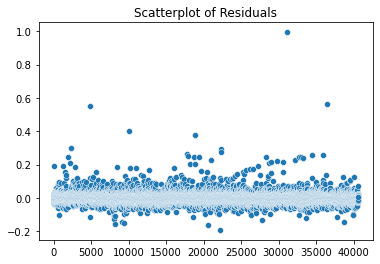

In [85]:
sns.scatterplot(x=range(len(linreg2.resid)), y=linreg2.resid)
plt.title("Scatterplot of Residuals");

Here, we see one or two unusually high residuals, but in general they seem centered around zero. Let's make a confidence interval fo the residual mean to make sure.

In [86]:
res2_mean = np.mean(linreg2.resid)
res2_std = np.std(linreg2.resid)
res2_se = res2_std / np.sqrt(len(linreg2.resid))
ci2_L = res2_mean - 1.96*res2_se
ci2_U = res2_mean + 1.96*res2_se

print("Confidence Interview for Residual Mean")
display(Math('{} < \mu < {}'.format(round(ci2_L,4), round(ci2_U,4))))

Confidence Interview for Residual Mean


<IPython.core.display.Math object>

Once again, zero is in the confidence interval and so we can say that the residuals are centered around zero.

Let's plot residuals versus fitted values and look for a pattern there. We want to see the residuals in lines of equal width, like we saw in before.

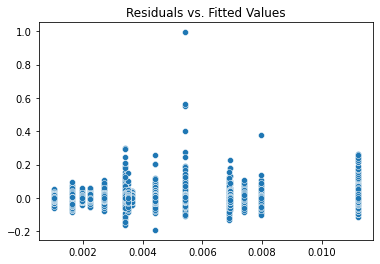

In [88]:
sns.scatterplot(x=linreg2.fittedvalues, y=linreg2.resid)
plt.title('Residuals vs. Fitted Values');

Hmm...the few high outliers may be problematic. But there are only a few of them, so there may be no issue here. To find out, we will first look at a normal probability plot to see if the residuals are approximately normal. If they are notably non-normal, then we will have to investigate further.

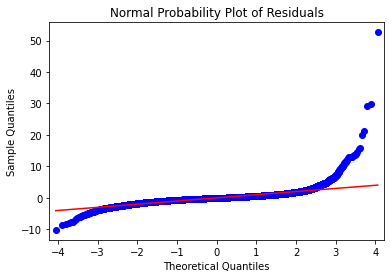

In [89]:
res2_scaled = (linreg2.resid - np.mean(linreg2.resid)) / np.std(linreg2.resid)
qqplot(res2_scaled, line='s')
plt.title('Normal Probability Plot of Residuals')
plt.show();

As expected, there is some deviation from normallity in the upper tail; it is wider than would be expected from a normal distribution. However, this occurs quite far up in the tails, so it should not be a problem for the ANOVA. We can conclude that the model fit the data well enough for the ANOVA to be valid.

## Tukey Test and Measure of the Differences

Now that it has been established that the publications do make a significant difference in coverage sentiment, a Tukey Test will be used to determine which publications are significantly different from one another. In this hypothesis test, the null hypothesis is that there is no difference:
$$\mu_1 - \mu_2 = 0$$
and the alternative hypothesis is that the two means are not the same:
$$\mu_1 - \mu_2 \ne 0$$

There will be many Tukey Tests performed using the same data, especially since we will test both neutrality and scaled_compound scores. Thus, Bonferroni's correction will be used. 

There are ${15 \choose 2} = 105$ ways to test the difference between two publications, and we will do it for two difference variables; Bonferroni's correction calls on us to use $\frac{\alpha}{210}$ as our significance level. For $\alpha=0.1$, the new significance level is approximately 0.0005; a p-value less than this number will be evidence that the mean sentimentality is different between the two publications.

In [133]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(rep_trimmed['neu'], rep_trimmed['publication'], alpha=0.001)
print(tukey_results.summary())

             Multiple Comparison of Means - Tukey HSD, FWER=0.00              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           Atlantic           Breitbart   0.0083  0.001  0.0026   0.014   True
           Atlantic    Business Insider  -0.0047 0.3113 -0.0124   0.003  False
           Atlantic       Buzzfeed News   0.0172  0.001  0.0085  0.0259   True
           Atlantic                 CNN   -0.004 0.3797 -0.0108  0.0028  False
           Atlantic            Fox News    0.013  0.001  0.0042  0.0218   True
           Atlantic            Guardian  -0.0042 0.3938 -0.0113   0.003  False
           Atlantic                 NPR   0.0009    0.9 -0.0063   0.008  False
           Atlantic     National Review  -0.0174  0.001 -0.0244 -0.0104   True
           Atlantic       New York Post   -0.007 0.0029 -0.0143  0.0004  False
           Atlantic      New York Times   0.0253  0.

The lowest p-value that the pairwise_tukeyhsd function will let us use is 0.001, and so the conclusions of the two Tukey Tests performed correspond to an original significance level of $\alpha=0.21$. This is a high significance level, which means it detects smaller differences as being significant. Under the circumstances of this analysis, the higher p-value means we are being more conservative; it is a much higher bar to clear for a publication to seem similar to another. In short, the high p-value is not an issue.

In the table above, the 'meandiff' column tells us the average difference in mean from group 1 to group 2:
$$\text{meandiff} = \overline{X}_2 - \overline{X}_1$$

The 'p-adj' value is the p-value, the probability of getting a 'meandiff' greater than that calculated difference under the assumption that the true difference in means is zero:
$$\text{p-adj} = P\left(\overline{X}_2 - \overline{X}_1\: |\: \mu_2 - \mu_1 = 0 \right)$$

The 'reject' columns is True when 'p-adj' is less than $\alpha=0.001$ and False otherwise.

In [132]:
tukey_results2 = pairwise_tukeyhsd(rep_trimmed['scaled_compound'], rep_trimmed['publication'], alpha=0.001)
print(tukey_results.summary2())

             Multiple Comparison of Means - Tukey HSD, FWER=0.00              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           Atlantic           Breitbart  -0.0078  0.001 -0.0098 -0.0059   True
           Atlantic    Business Insider  -0.0085  0.001 -0.0112 -0.0059   True
           Atlantic       Buzzfeed News  -0.0068  0.001 -0.0098 -0.0038   True
           Atlantic                 CNN  -0.0077  0.001 -0.0101 -0.0054   True
           Atlantic            Fox News  -0.0076  0.001 -0.0106 -0.0046   True
           Atlantic            Guardian  -0.0096  0.001  -0.012 -0.0071   True
           Atlantic                 NPR  -0.0043  0.001 -0.0067 -0.0018   True
           Atlantic     National Review  -0.0038  0.001 -0.0062 -0.0014   True
           Atlantic       New York Post   -0.009  0.001 -0.0115 -0.0065   True
           Atlantic      New York Times  -0.0033  0.

This table of the Tukey Test results for difference in mean scaled_compound sentiment reveals something interesting: Atlantic has a significantly higher mean scaled_compound sentiment than any other publication. Let's take a moment to remember that the articles in question come from January 2016 - July 2017, and we are looking at sentiment on articles about Republicans.

Breitbart has lower scaled_compound score in these articles than the New York Time, Washington Post, or NPR, but is not significantly difference from CNN.

CNN does not have a significantly difference mean scaled_compound score than Fox News or Breitbart or the Washington Post, but it does have a lower scaled_compound sentiment than NPR or the New York Times.

Fox News has a significantly lower scaled_compound sentiment intensity than NPR and the New York Times.

NPR has a higher mean scaled_compound sentiment intensity than the New York Post, Reuters, and Talking Points Memo, but is not significantly different from the New York Times or Washington Post.

The New York Times has significantly higher scaled_compound intensity in these articles compared to Reuters, Talking Points Memo, and the Washington Post.

There is a lot of information about which publications are different from each other in the table above. Let's look at a barplot of the mean scaled_compound scores to help us make sense of the hierarchy of scores.

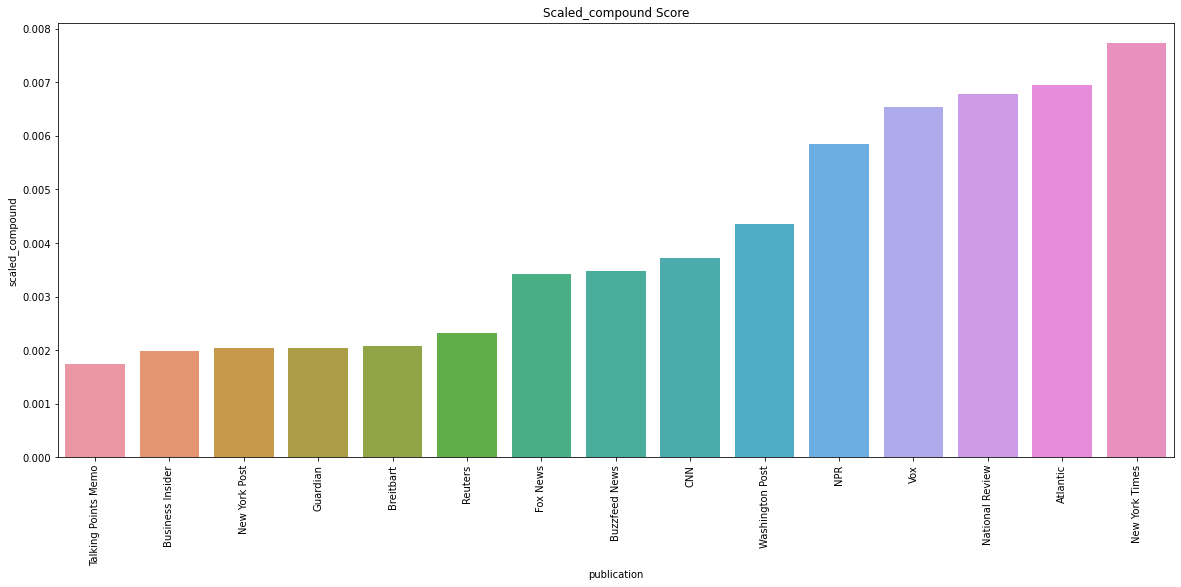

In [31]:
plt.figure(figsize=(20,8))
sns.barplot(x=rep_arts.groupby('publication')['scaled_compound'].median().sort_values().index,
           y=rep_arts.groupby('publication')['scaled_compound'].median().sort_values())
plt.title('Scaled_compound Score')
plt.xticks(rotation=90);